<h1>Assessment Project</h1>

Submitted by: <b>Yanda Sebega</b>

Date: <b>24-Dec-2021</b>

Module: Advanced Deep Learning and Computer Vision (by <b>Nikhil Garg</b>)

Institution: <b>Simplilearn Solutions</b>

<h2> 1. Input the required libraries </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.optimizers import Adam

import keras
from keras.models import Sequential
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, Dropout)


<h2> 2. Load the dataset after loading the dataset, you have to normalize every image.</h2>


In [2]:
# load the dataset
data = np.load('ORL_faces.npz')

In [3]:
print(data.files)

['testY', 'testX', 'trainX', 'trainY']


In [4]:
# normalize every image
# train split
x_train = np.array(data['trainX'], dtype = 'float32')/255

# test split
x_test = np.array(data['testX'], dtype = 'float32')/255

# training and test the labels
y_train = data['trainY']
y_test = data['testY']

<h2> 3. Split the dataset </h2> 

In [5]:
# split the dataset into training and validation sets using train_test_split from sklearn
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.05, random_state=777)

In [6]:
print(x_train.shape, x_val.shape, x_test.shape)

(228, 10304) (12, 10304) (160, 10304)


<h2> 4. Transform the images to equal sizes to feed in CNN </h2>

In [7]:
# image size is 112 by 92...
row = 112
column = 92
img_shape = (row, column, 1)

x_train = x_train.reshape(x_train.shape[0], *img_shape)
x_test = x_test.reshape(x_test.shape[0], *img_shape)
x_val = x_val.reshape(x_val.shape[0], *img_shape)

In [8]:
print(x_train.shape, x_val.shape, x_test.shape)

(228, 112, 92, 1) (12, 112, 92, 1) (160, 112, 92, 1)


<h2> 5. Build a CNN model that has 3 main layers: </h2>

In [9]:
# define im_shape...above
model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=img_shape), 
    MaxPooling2D(pool_size=2), 
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape=img_shape), 
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'), 
    Dropout(0.5),
    Dense(1024, activation='relu'), 
    Dropout(0.5),
    Dense(512, activation='relu'), 
    Dropout(0.5),
    Dense(20, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

<h2> 6. Train the model </h2>

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    np.array(x_train), 
    np.array(y_train), 
    batch_size=512, 
    epochs=113, 
    verbose=1, 
    validation_data=(np.array(x_val), np.array(y_val)))

Epoch 1/113
1/1 [==============================] - 6s 6s/step - loss: 2.9805 - accuracy: 0.0658 - val_loss: 3.0162 - val_accuracy: 0.0833
Epoch 2/113
1/1 [==============================] - 5s 5s/step - loss: 3.0120 - accuracy: 0.0570 - val_loss: 3.0158 - val_accuracy: 0.0000e+00
Epoch 3/113
1/1 [==============================] - 5s 5s/step - loss: 2.9999 - accuracy: 0.0351 - val_loss: 3.0028 - val_accuracy: 0.0000e+00
Epoch 4/113
1/1 [==============================] - 4s 4s/step - loss: 3.0271 - accuracy: 0.0570 - val_loss: 2.9943 - val_accuracy: 0.0000e+00
Epoch 5/113
1/1 [==============================] - 5s 5s/step - loss: 3.0078 - accuracy: 0.0570 - val_loss: 2.9829 - val_accuracy: 0.0833
Epoch 6/113
1/1 [==============================] - 5s 5s/step - loss: 3.0003 - accuracy: 0.0702 - val_loss: 2.9726 - val_accuracy: 0.1667
Epoch 7/113
1/1 [==============================] - 5s 5s/step - loss: 2.9793 - accuracy: 0.0658 - val_loss: 2.9661 - val_accuracy: 0.0833
Epoch 8/113
1/1 [=====

Epoch 60/113
1/1 [==============================] - 6s 6s/step - loss: 1.3839 - accuracy: 0.6140 - val_loss: 0.9113 - val_accuracy: 0.9167
Epoch 61/113
1/1 [==============================] - 7s 7s/step - loss: 1.3738 - accuracy: 0.6360 - val_loss: 0.8340 - val_accuracy: 0.9167
Epoch 62/113
1/1 [==============================] - 7s 7s/step - loss: 1.2426 - accuracy: 0.6711 - val_loss: 0.7698 - val_accuracy: 0.9167
Epoch 63/113
1/1 [==============================] - 7s 7s/step - loss: 1.1492 - accuracy: 0.6667 - val_loss: 0.7073 - val_accuracy: 0.9167
Epoch 64/113
1/1 [==============================] - 6s 6s/step - loss: 1.0990 - accuracy: 0.6974 - val_loss: 0.6573 - val_accuracy: 0.9167
Epoch 65/113
1/1 [==============================] - 6s 6s/step - loss: 0.9966 - accuracy: 0.7544 - val_loss: 0.6165 - val_accuracy: 0.9167
Epoch 66/113
1/1 [==============================] - 6s 6s/step - loss: 1.0408 - accuracy: 0.7018 - val_loss: 0.5905 - val_accuracy: 0.9167
Epoch 67/113
1/1 [=========

In [22]:
# evaluate the model using the test set.
evaluate = model.evaluate(np.array(x_test), np.array(y_test), verbose=1)

5/5 [==============================] - 1s 190ms/step - loss: 0.2938 - accuracy: 0.9438


<h2> 7. Plot the result </h2>

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


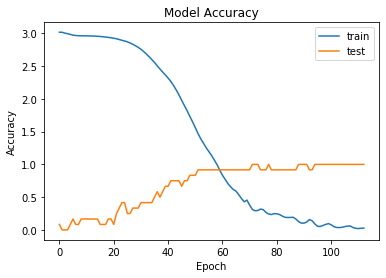

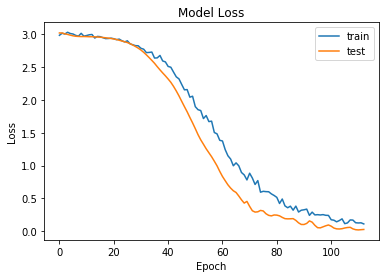

In [13]:
# Plotting...
val_acc = accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = accuracy = history.history['val_loss']
loss = history.history['loss']

# accuracy
plt.plot(accuracy)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='best')
plt.show()
# loss

plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='best')
plt.show()